## Classfication of CART

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0  #Erase the first row
                  )
data.head()
data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
data.head()
type(data)

pandas.core.frame.DataFrame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 4 columns):
V               1000 non-null float64
T               1000 non-null float64
HRR             1000 non-null float64
BackDistance    1000 non-null int32
dtypes: float64(3), int32(1)
memory usage: 35.2 KB


In [5]:
data.head()

,V,T,HRR,BackDistance
Id,,,,
1,2.7486,16.8125,5578.8956,0
2,1.1585,12.8702,9768.1077,1
3,1.0696,23.5542,11833.7440,1
4,2.3904,14.4162,7735.6189,0
5,0.5358,14.7729,11367.2940,1


In [6]:
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape

((1000, 3), (1000, 1))

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state = 40)
#Modify the index of test set and training set
Xtrain.head()
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#View the divided training set and test set
Xtrain.head()

,V,T,HRR
0,2.5057,29.1050,10633.1450
1,2.1094,15.3562,6597.3150
2,1.2852,15.2067,14582.9360
3,1.6113,26.5699,5462.4926
4,1.5948,20.1767,9989.1522


In [8]:
#cross-validation and tuning parameters
clf = DecisionTreeClassifier(random_state=25  ##tuning1
                            ,max_depth = 3    ##tuning2
                            )
clf = clf.fit(Xtrain, Ytrain)
score = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()

              precision    recall  f1-score   support

     class 0     0.9903    0.9714    0.9808       105
     class 1     0.9848    0.9949    0.9898       195

    accuracy                         0.9867       300
   macro avg     0.9875    0.9832    0.9853       300
weighted avg     0.9867    0.9867    0.9866       300

ACC: 0.9866666666666667
CART
[[102   3]
 [  1 194]]


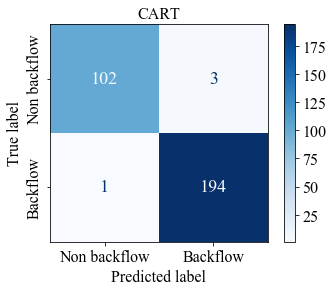

In [19]:
#validation and performance metrics
clf = DecisionTreeClassifier(random_state=25  ##tuning1
                            ,max_depth = 3    ##tuning2
                            )
clf = clf.fit(Xtrain, Ytrain)
y_predict = clf.predict(Xtest)
target_names = ['class 0', 'class 1']
acc = accuracy_score(Ytest, y_predict)
print(classification_report(Ytest, y_predict, target_names=target_names, digits=4))
print('ACC:',acc)
# Plot non-normalized confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
class_names = ['Non backflow','Backflow']
titles_options = [("CART", None)
                 #,("Normalized confusion matrix", 'true')
                 ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',
                                 normalize=None
                               # ,family = 'Times New Roman'
                                )
    disp.ax_.set_title(title,fontsize = 16,family = 'Times New Roman')

    print(title)
    print(disp.confusion_matrix)
    plt.savefig('CART.svg', bbox_inches='tight')
plt.show()

In [81]:
m,n = 0,0
m

0

In [142]:
#############################
# pppppppp
#  lllllllll
#     ooooooooo
#       tttttttttt
##############################
ytest = Ytest.values.reshape(-1,1).ravel()
yy=y_predict.reshape(-1,1).ravel()
sample = np.arange(300).ravel()
sm = (sample).reshape(-1,1).ravel()
A=[sm,yy,ytest]
B=np.zeros((3, 296))#right
C=np.zeros((3, 4))#falut
np.array(A).shape
m,n = 0,0
for i in range(300):
    if A[1][i] == A[2][i]:
        B[0][m] = A[0][i]
        B[1][m] = A[1][i]
        B[2][m] = A[2][i]
        m = m+1
    else:
        C[0][n] = A[0][i]
        C[1][n] = A[1][i]
        C[2][n] = A[2][i]
        n = n+1
np.savetxt('CART_right.txt',B,fmt = '%d')
np.savetxt('CART_fault.txt',C,fmt = '%d')

(3, 300)

In [49]:
ytest.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

D:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


              precision    recall  f1-score   support

     class 0     0.9900    0.9429    0.9659       105
     class 1     0.9700    0.9949    0.9823       195

    accuracy                         0.9767       300
   macro avg     0.9800    0.9689    0.9741       300
weighted avg     0.9770    0.9767    0.9765       300

ACC: 0.9766666666666667
RF
[[ 99   6]
 [  1 194]]


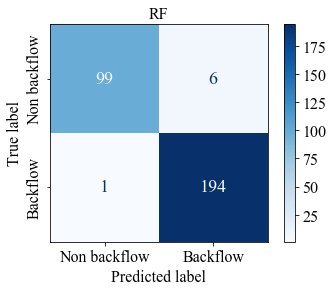

In [146]:
rfc = RandomForestClassifier(random_state=90
                             , n_estimators = 32
                             , criterion = 'entropy'
                             , max_depth = 4
                             , min_samples_split=2
                             , min_samples_leaf=1
                             , min_weight_fraction_leaf=0.0
                             , n_jobs = -1
                            )
rfc = rfc.fit(Xtrain, Ytrain)
y_predict_RF = rfc.predict(Xtest)
target_names = ['class 0', 'class 1']
acc_RF = accuracy_score(Ytest, y_predict_RF)
print(classification_report(Ytest, y_predict_RF, target_names=target_names, digits=4))
print('ACC:',acc_RF)
# Plot non-normalized confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
class_names = ['Non backflow','Backflow']
titles_options = [("RF", None)
                 #,("Normalized confusion matrix", 'true')
                 ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',
                                 normalize=None)
    disp.ax_.set_title(title,fontsize = 16,family = 'Times New Roman')

    print(title)
    print(disp.confusion_matrix)
    plt.savefig('RF.svg', bbox_inches='tight')
plt.show()

In [147]:
#############################
# pppppppp
#  lllllllll
#     ooooooooo
#       tttttttttt
##############################
ytest = Ytest.values.reshape(-1,1).ravel()
yy=y_predict_RF.reshape(-1,1).ravel()
sample = np.arange(300).ravel()
sm = (sample).reshape(-1,1).ravel()
A=[sm,yy,ytest]
B=np.zeros((3, 293))#right
C=np.zeros((3, 7))#falut
np.array(A).shape
m,n = 0,0
for i in range(300):
    if A[1][i] == A[2][i]:
        B[0][m] = A[0][i]
        B[1][m] = A[1][i]
        B[2][m] = A[2][i]
        m = m+1
    else:
        C[0][n] = A[0][i]
        C[1][n] = A[1][i]
        C[2][n] = A[2][i]
        n = n+1
np.savetxt('RF_right.txt',B,fmt = '%d')
np.savetxt('RF_fault.txt',C,fmt = '%d')

In [21]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
clf_val_score = DecisionTreeClassifier(random_state=25
                            ,max_depth = 3
                            )
scoring = ['precision', 'recall']
scores = cross_validate(clf_val_score, Xtrain, Ytrain,scoring=scoring, cv=5)
sorted(scores.keys())
scores['train_precision']
scores['test_precision']
# scores   

# >>> sorted(scores.keys())
# ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
# >>> scores['test_recall_macro']                       
# array([0.96..., 1.  ..., 0.96..., 0.96..., 1.        ])

D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.96703297, 0.98876404, 0.97802198, 0.97727273, 0.97727273])

In [9]:
# import numpy as np
# predict_y = clf.predict(Xtest)
# y_pre = predict_y[:,np.newaxis]
# y = Ytest.iloc[:,0].values[:,np.newaxis]
# pd.DataFrame(np.concatenate([y_pre, y],axis = 1),columns = ['Prediction','inition']).head()
# # y.shape

0.979979597959796


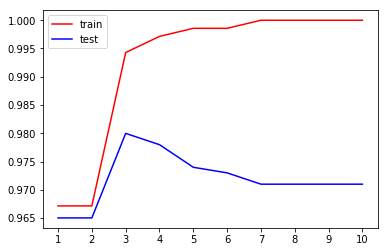

array([0.89071505, 0.02241718, 0.08686778])

In [14]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
clf.feature_importances_

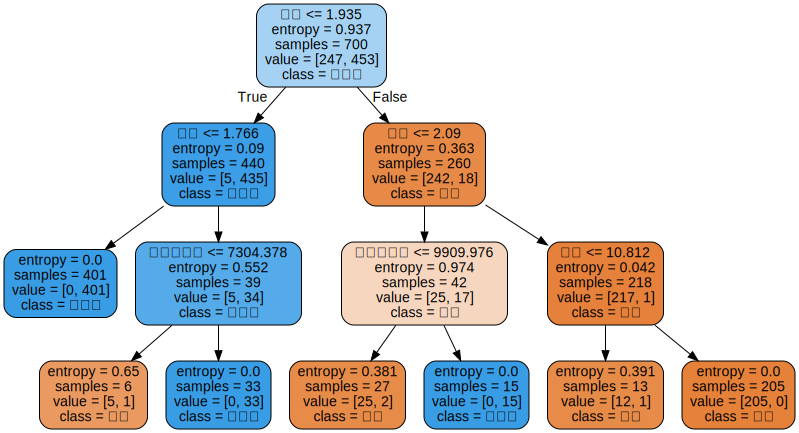

In [12]:
clf = DecisionTreeClassifier(random_state=25, max_depth=3, criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

feature_name = ['V','T','HRR']

import graphviz
dot_data = tree.export_graphviz(clf, out_file = None
                                ,feature_names = feature_name
                                ,class_names=["BACKFLOW","NON-BACKFLOW"]
                                ,filled=True
                                ,rounded=True
                               ) 
graph = graphviz.Source(dot_data)
graph

In [28]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9842857142857143

In [1]:
GS.best_params_

NameError: name 'GS' is not defined

## Regression of CART

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0  
                  )
data.head()
#data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
data.head()
#type(data)
#data = data.sort_values('V').reset_index(drop = True)
#.drop('Id')
data.head()

,V,T,HRR,BackDistance
Id,,,,
1,2.7486,16.8125,5578.8956,8.519
2,1.1585,12.8702,9768.1077,22.687
3,1.0696,23.5542,11833.7440,23.588
4,2.3904,14.4162,7735.6189,9.991
5,0.5358,14.7729,11367.2940,28.385


In [3]:
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape

((1000, 3), (1000, 1))

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
#modify the index
Xtrain.head()
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#viwe the data
a = pd.concat([Xtest,Ytest],axis = 1)
a = a.sort_values('V').reset_index(drop = True)
Xtest = a.iloc[:,data.columns != "BackDistance"]
Ytest = a.iloc[:,data.columns == "BackDistance"]
Xtrain.head()

,V,T,HRR
0,1.7060,17.7325,13556.6620
1,2.2371,11.1433,13045.4580
2,2.3274,21.8171,14894.7270
3,1.0299,14.6833,6544.0019
4,2.2076,16.1504,13880.0520


In [5]:
clf = DecisionTreeRegressor(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

score_

score = cross_val_score(clf,X,y,cv=10).mean()

score

0.9760887330117564

0.981071113119882


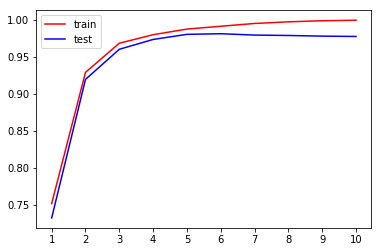

In [6]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeRegressor( presort = True
                                 ,random_state=25
                                 ,max_depth=i+1
                                 ,criterion="mse"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

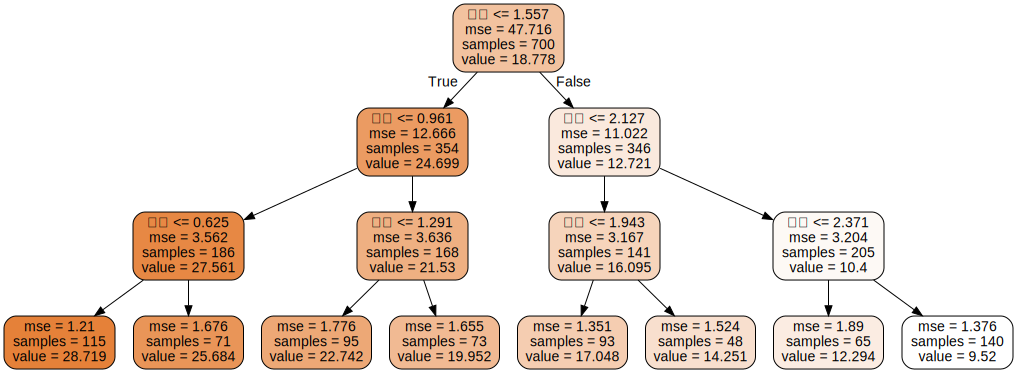

In [7]:
clf1 = DecisionTreeRegressor(random_state=25, max_depth=3, criterion="mse")
clf2 = DecisionTreeRegressor(random_state=25, max_depth=5, criterion="mse")
clf1 = clf1.fit(Xtrain, Ytrain)
clf2 = clf2.fit(Xtrain, Ytrain)
score_ = clf1.score(Xtest, Ytest)
#score_2 = clf2.score(Xtest, Ytest)
feature_name = ['V','T','HRR']

import graphviz
dot_data = tree.export_graphviz(clf1, out_file = None
                                ,feature_names = feature_name
                                #,class_names=["bf","non-bf"]
                                ,filled=True
                                ,rounded=True
                               ) 
graph = graphviz.Source(dot_data)
graph

In [8]:
import numpy as np
# a = pd.concat([Xtest,Ytest],axis = 1)
# a = a.sort_values('V').reset_index(drop = True)
# Xtest = a.iloc[:,data.columns != "BackDistance"]
# Ytest = a.iloc[:,data.columns == "BackDistance"]
y_1 = clf1.predict(Xtest)
y_2 = clf2.predict(Xtest)
xx = Xtest.iloc[:,0][:, np.newaxis]
xx.shape
#X_test

(300, 1)

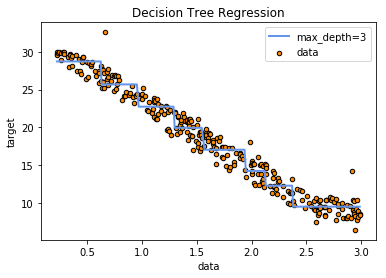

In [10]:
plt.figure()
plt.scatter(xx, Ytest, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(xx, y_1, color="cornflowerblue",label="max_depth=3", linewidth=2)
#plt.plot(xx, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [30]:
#help(plt.scatter)

In [1]:
clf2.feature_importances_

NameError: name 'clf2' is not defined